### Practical Sheet 2: Linear Regression

#### 01-Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

#### 01-Data & Transformation

In [2]:
path01 = "insurance.csv"

In [3]:
df = pd.read_csv(path01)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#change column sex from char to int
df['sex'] =  df['sex'].replace('male', 0)
df['sex'] =  df['sex'].replace('female', 1)

In [8]:
#change column smoker from char to int
df['smoker'] =  df['smoker'].replace('no', 0)
df['smoker'] =  df['smoker'].replace('yes', 1)

In [10]:
#change column region from char to int
    #When
    #latitude: north=0 and south=1
    #longitude: east=0 and west=1

In [11]:
for i in range(0,len(df)):
    if df.loc[i, 'region'] == 'southwest':
        df.loc[i, 'lat'] = 1
        df.loc[i, 'long'] = 1
    elif df.loc[i, 'region'] == 'southeast':
          df.loc[i, 'lat'] = 1
          df.loc[i, 'long'] = 0
    if df.loc[i, 'region'] == 'northwest':
        df.loc[i, 'lat'] = 0
        df.loc[i, 'long'] = 1
    else:
        df.loc[i, 'lat'] = 0
        df.loc[i, 'long'] = 0

In [12]:
df.drop(['region'], axis=1, inplace=True)

In [13]:
df.head(20)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,0.0,0.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,0.0,0.0
6,46,1,33.440,1,0,8240.58960,0.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


<AxesSubplot:>

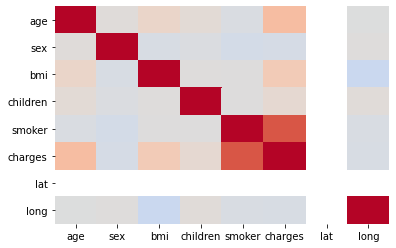

In [14]:
#get correlations of each features in dataset
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rene_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

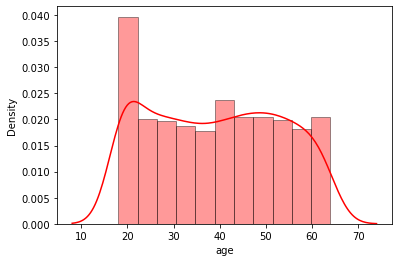

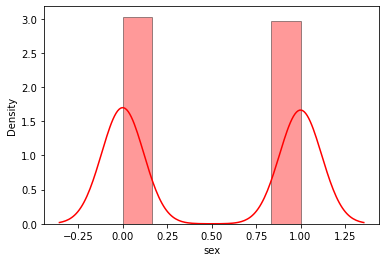

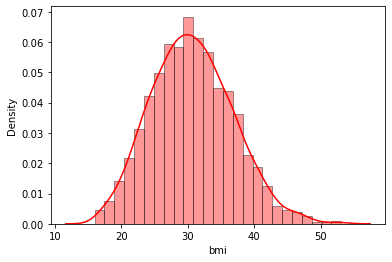

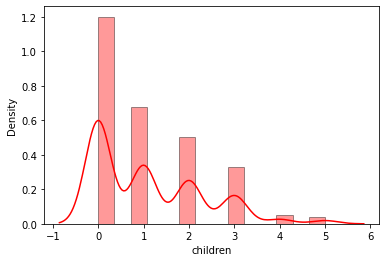

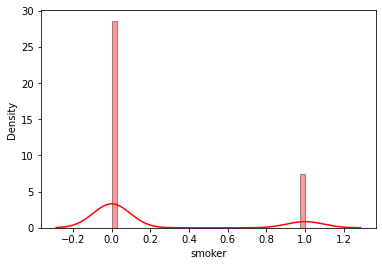

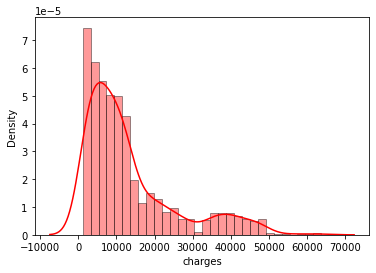

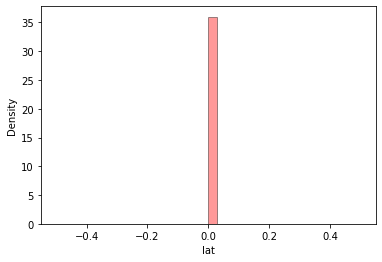

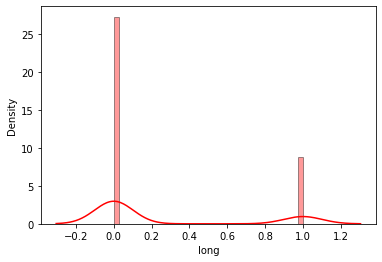

In [15]:
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], color='red', hist_kws={"edgecolor": 'black'})